<a href="https://colab.research.google.com/github/reulke/POL/blob/main/231117_Pol04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install polanalyser

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Color processing
import cv2
import polanalyser as pa
import os
import numpy as np

viz_file_name = "/content/drive/MyDrive/img/pol/240916_DYK/ColRED_045.tiff"
img_raw = cv2.imread(viz_file_name, 0)

# Dateipfad und Dateiname trennen
verzeichnis, datei = os.path.split(viz_file_name)
# Dateiname und Dateityp (Erweiterung) trennen
file_name, erweiterung = os.path.splitext(datei)

img_000, img_045, img_090, img_135 = pa.demosaicing(img_raw, pa.COLOR_PolarRGB)

#_0_
image_list = [img_000[:, :, 0], img_045[:, :, 0], img_090[:, :, 0], img_135[:, :, 0]]
angles = np.deg2rad([0, 45, 90, 135])
img_stokes = pa.calcStokes(image_list, angles)
print("img_stokes",img_stokes.shape,img_stokes.dtype)

# Decompose the Stokes vector into its components
img_s0, img_s1, img_s2 = cv2.split(img_stokes)

# Convert the Stokes vector to Intensity, DoLP and AoLP
img_intensity = pa.cvtStokesToIntensity(img_stokes)
img_dolp = pa.cvtStokesToDoLP(img_stokes)
img_aolp = pa.cvtStokesToAoLP(img_stokes)
print("img_intensity",img_intensity.shape,img_intensity.dtype)

oname = file_name + '_0_intensity.tiff'
print(verzeichnis,oname)
cv2.imwrite(os.path.join(verzeichnis, oname), img_intensity)
oname = file_name + '_0_dolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_dolp)
oname = file_name + '_0_aolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_aolp)

#_1_
image_list = [img_000[:, :, 1], img_045[:, :, 1], img_090[:, :, 1], img_135[:, :, 1]]
angles = np.deg2rad([0, 45, 90, 135])
img_stokes = pa.calcStokes(image_list, angles)
print("img_stokes",img_stokes.shape,img_stokes.dtype)

# Decompose the Stokes vector into its components
img_s0, img_s1, img_s2 = cv2.split(img_stokes)

# Convert the Stokes vector to Intensity, DoLP and AoLP
img_intensity = pa.cvtStokesToIntensity(img_stokes)
img_dolp = pa.cvtStokesToDoLP(img_stokes)
img_aolp = pa.cvtStokesToAoLP(img_stokes)
print("img_intensity",img_intensity.shape,img_intensity.dtype)

oname = file_name + '_1_intensity.tiff'
print(verzeichnis,oname)
cv2.imwrite(os.path.join(verzeichnis, oname), img_intensity)
oname = file_name + '_1_dolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_dolp)
oname = file_name + '_1_aolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_aolp)

#_2_
image_list = [img_000[:, :, 2], img_045[:, :, 2], img_090[:, :, 2], img_135[:, :, 2]]
angles = np.deg2rad([0, 45, 90, 135])
img_stokes = pa.calcStokes(image_list, angles)
print("img_stokes",img_stokes.shape,img_stokes.dtype)

# Decompose the Stokes vector into its components
img_s0, img_s1, img_s2 = cv2.split(img_stokes)

# Convert the Stokes vector to Intensity, DoLP and AoLP
img_intensity = pa.cvtStokesToIntensity(img_stokes)
img_dolp = pa.cvtStokesToDoLP(img_stokes)
img_aolp = pa.cvtStokesToAoLP(img_stokes)
print("img_intensity",img_intensity.shape,img_intensity.dtype)

oname = file_name + '_2_intensity.tiff'
print(verzeichnis,oname)
cv2.imwrite(os.path.join(verzeichnis, oname), img_intensity)
oname = file_name + '_2_dolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_dolp)
oname = file_name + '_2_aolp.tiff'
cv2.imwrite(os.path.join(verzeichnis, oname), img_aolp)




img_stokes (2048, 2448, 3) float64
img_intensity (2048, 2448) float64
/content/drive/MyDrive/img/pol/240916_DYK ColRED_045_0_intensity.tiff
img_stokes (2048, 2448, 3) float64
img_intensity (2048, 2448) float64
/content/drive/MyDrive/img/pol/240916_DYK ColRED_045_1_intensity.tiff
img_stokes (2048, 2448, 3) float64
img_intensity (2048, 2448) float64
/content/drive/MyDrive/img/pol/240916_DYK ColRED_045_2_intensity.tiff


True

In [ ]:
# Show the images with bounding boxes in Colab
import os
import numpy as np
from PIL import Image
import polanalyser as pa
from matplotlib import pyplot as plt
# from IPython.display import display
import cv2
from pathlib import Path


visualization_dir = "/content/drive/MyDrive/img/pol/240912/"

for viz_file_name in os.listdir(visualization_dir):
  print(viz_file_name)
  # file_name = os.path.basename(viz_file_name)

  # Dateipfad und Dateiname trennen
  verzeichnis, datei = os.path.split(viz_file_name)

  # Dateiname und Dateityp (Erweiterung) trennen
  file_name, erweiterung = os.path.splitext(datei)

  img = Image.open(os.path.join(visualization_dir, viz_file_name))
  im = np.array(img, dtype=np.float64)

  # Display basic information about the image
  # print(im.shape,im.dtype)

  # Demosaicing
  img_000, img_045, img_090, img_135 = pa.demosaicing(im, pa.COLOR_PolarMono)
  # print(img_000.shape,img_000.dtype)

  # Calculate the Stokes vector per-pixel
  image_list = [img_000, img_045, img_090, img_135]
  angles = np.deg2rad([0, 45, 90, 135])
  img_stokes = pa.calcStokes(image_list, angles)
  # print(img_stokes.shape,img_stokes.dtype)

  # Decompose the Stokes vector into its components
  img_s0, img_s1, img_s2 = cv2.split(img_stokes)

  # Convert the Stokes vector to Intensity, DoLP and AoLP
  img_intensity = pa.cvtStokesToIntensity(img_stokes)
  img_dolp = pa.cvtStokesToDoLP(img_stokes)
  img_aolp = pa.cvtStokesToAoLP(img_stokes)
  # print(img_intensity.shape,img_intensity.dtype)

  oname = file_name + '_intensity.tiff'
  cv2.imwrite(os.path.join(visualization_dir, oname), img_intensity)
  oname = file_name + '_dolp.tiff'
  cv2.imwrite(os.path.join(visualization_dir, oname), img_dolp)
  oname = file_name + '_aolp.tiff'
  cv2.imwrite(os.path.join(visualization_dir, oname), img_aolp)


ara_001.tiff
ara_002.tiff
ara_003.tiff
ara_004.tiff
ara_005.tiff
ara_006.tiff
ara_007.tiff
.ipynb_checkpoints


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/img/pol/240912/.ipynb_checkpoints'

0.34067674691827815 3.357781142295456e-17


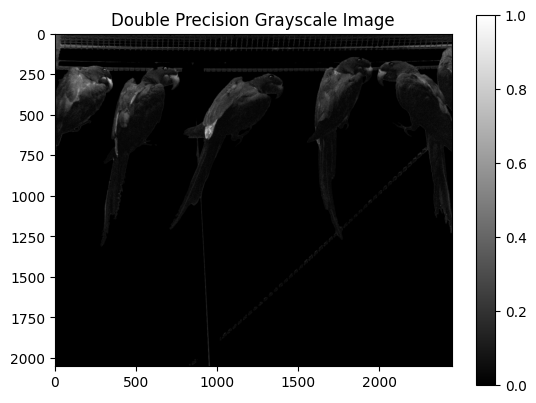

In [ ]:
# Visualisation
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# Bild im Standardformat laden (8-Bit)
img = cv2.imread('/content/drive/MyDrive/img/pol/240911/POL_007.tiff_dolp.tiff', cv2.IMREAD_UNCHANGED)

# Überprüfen, ob das Bild korrekt geladen wurde
if img is None:
    print("Bild konnte nicht geladen werden.")
else:
    # Bild in double precision (64-Bit float) umwandeln
    img_double = np.float64(img)

    # Bildwerte auf den Bereich 0 bis 1 normalisieren, wenn sie größer als 1 sein sollten
    img_normalized = (img_double-np.min(img_double)) / (np.max(img_double)-np.min(img_double))
    print(np.max(img_double),np.min(img_double))
    # Grauwertbild mit Matplotlib anzeigen
    plt.imshow(img_normalized, cmap='gray')
    plt.title('Double Precision Grayscale Image')
    plt.colorbar()  # optional, um die Farbskala anzuzeigen
    plt.show()

In [ ]:
import cv2
import polanalyser as pa

# Read all images
path = "/content/drive/MyDrive/img/pol/toy_example_3x3_pc"
pcontainer = pa.PolarizationContainer(path)
image_list = pcontainer.get_list("image")
mueller_psg_list = pcontainer.get_list("mueller_psg")
mueller_psa_list = pcontainer.get_list("mueller_psa")

print(len(pcontainer))  # 16
print(image_list[0].shape)  # (2048, 2448)
print(mueller_psg_list[0].shape)  # (3, 3)
print(mueller_psa_list[0].shape)  # (3, 3)

# Calculate Mueller matrix
img_mueller = pa.calcMueller(image_list, mueller_psg_list, mueller_psa_list)

print(img_mueller.shape)  # (2048, 2448, 3, 3)

# Visualize Mueller matrix image
pa.plotMueller("plot_mueller.png", img_mueller, vabsmax=2.0)

FileNotFoundError: ignored